In [15]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [21]:
import pandas as pd

# Full path to your local file
file_path = r"C:\Users\Maryanne\Desktop\iris.data"

# === Load the dataset ===
try:
    # Try reading the file with headers first
    df = pd.read_csv(file_path)
    
    # Check if the expected column exists (species)
    if "species" not in df.columns:
        raise ValueError("No headers found in file, switching to manual column names.")
        
except Exception as e:
    # If file has no headers, add them manually
    print(f"⚠ {e}")
    column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
    df = pd.read_csv(file_path, header=None, names=column_names)

# === Explore the dataset ===
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns)

print("\nStatistical Summary:")
print(df.describe())



⚠ No headers found in file, switching to manual column names.

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Column names:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50

 Basic Data Analysis

In [23]:

# Group by categorical column (species)
grouped = df.groupby("species").mean()
print("\nMean of numerical columns grouped by species:")
print(grouped)

# Find which species has the largest average petal length
max_species = grouped["petal_length"].idxmax()
print(f"\nObservation: {max_species} has the largest average petal length.")



Mean of numerical columns grouped by species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

Observation: Iris-virginica has the largest average petal length.


data visualization

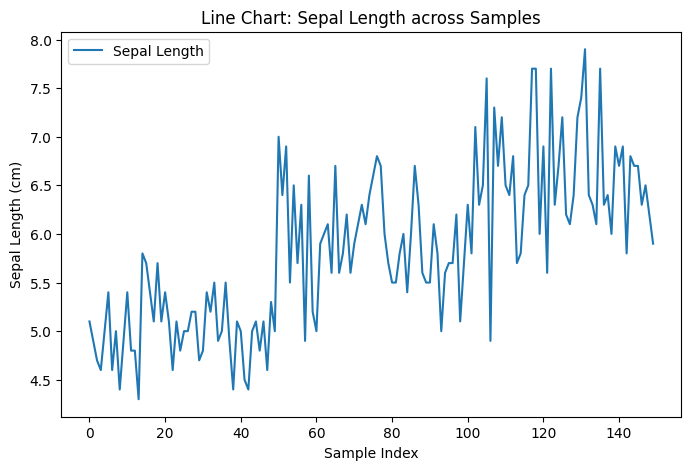

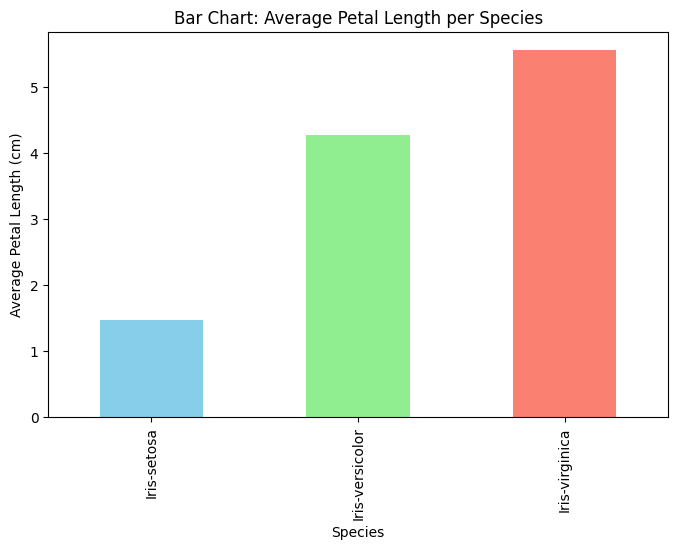

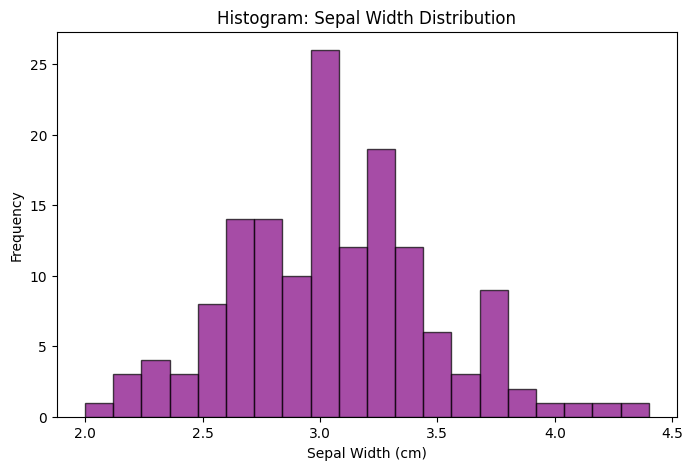

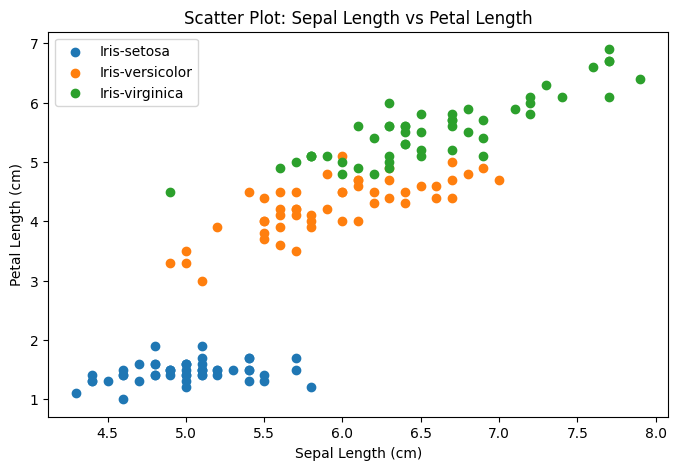

In [24]:
# 1. Line chart 
plt.figure(figsize=(8, 5))
plt.plot(df.index, df["sepal_length"], label="Sepal Length")
plt.title("Line Chart: Sepal Length across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()

# 2. Bar chart - average petal length per species
plt.figure(figsize=(8, 5))
grouped["petal_length"].plot(kind="bar", color=["skyblue", "lightgreen", "salmon"])
plt.title("Bar Chart: Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram - distribution of sepal width
plt.figure(figsize=(8, 5))
plt.hist(df["sepal_width"], bins=20, color="purple", edgecolor="black", alpha=0.7)
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot - Sepal length vs Petal length, colored by species
plt.figure(figsize=(8, 5))
for species in df["species"].unique():
    subset = df[df["species"] == species]
    plt.scatter(subset["sepal_length"], subset["petal_length"], label=species)
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()
